In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML
# figures inline in notebook
%matplotlib inline
np.set_printoptions(suppress=True)


In [ ]:
df=pd.read_csv('Churn_Modelling.csv')
df.columns = ["V"+str(i) for i in range(1, len(df.columns)+1)]
X = df.loc[:, "V2":] # independent variables data
y = df.V1 # dependednt variable data
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      10000 non-null  int64  
 1   V2      10000 non-null  int64  
 2   V3      10000 non-null  object 
 3   V4      10000 non-null  int64  
 4   V5      10000 non-null  object 
 5   V6      10000 non-null  object 
 6   V7      10000 non-null  int64  
 7   V8      10000 non-null  int64  
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  int64  
 10  V11     10000 non-null  int64  
 11  V12     10000 non-null  int64  
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


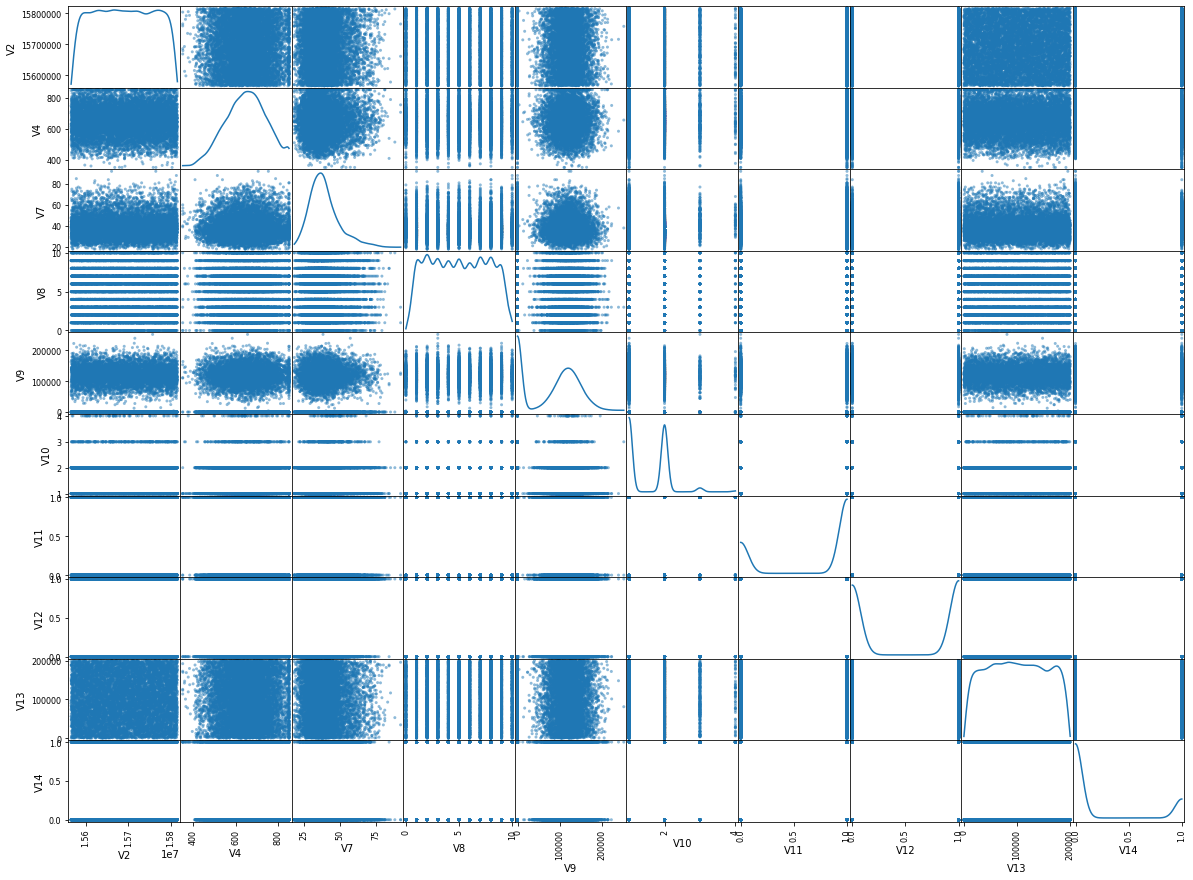

In [ ]:
pd.plotting.scatter_matrix(df.loc[:, "V2":"V14"], diagonal="kde",figsize=(20,15))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

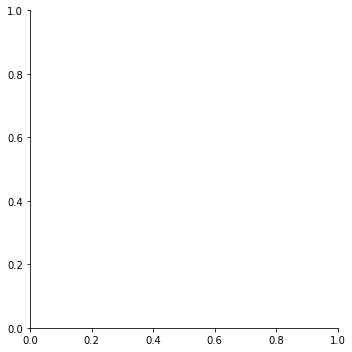

In [ ]:
for i in range(2,14):
    sns.lmplot("V"+str(i), "V"+str(i+1), df, hue="V1", fit_reg=False);

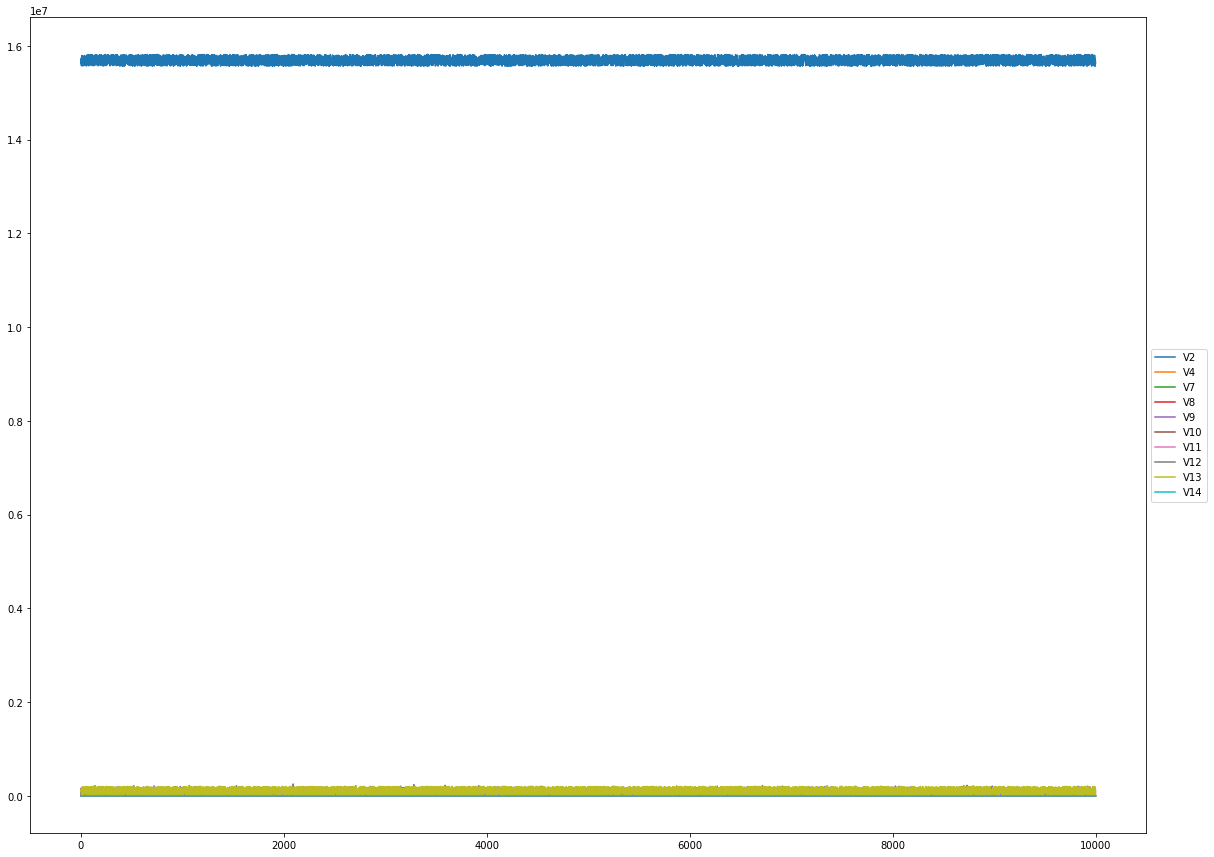

In [ ]:
ax = df[["V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

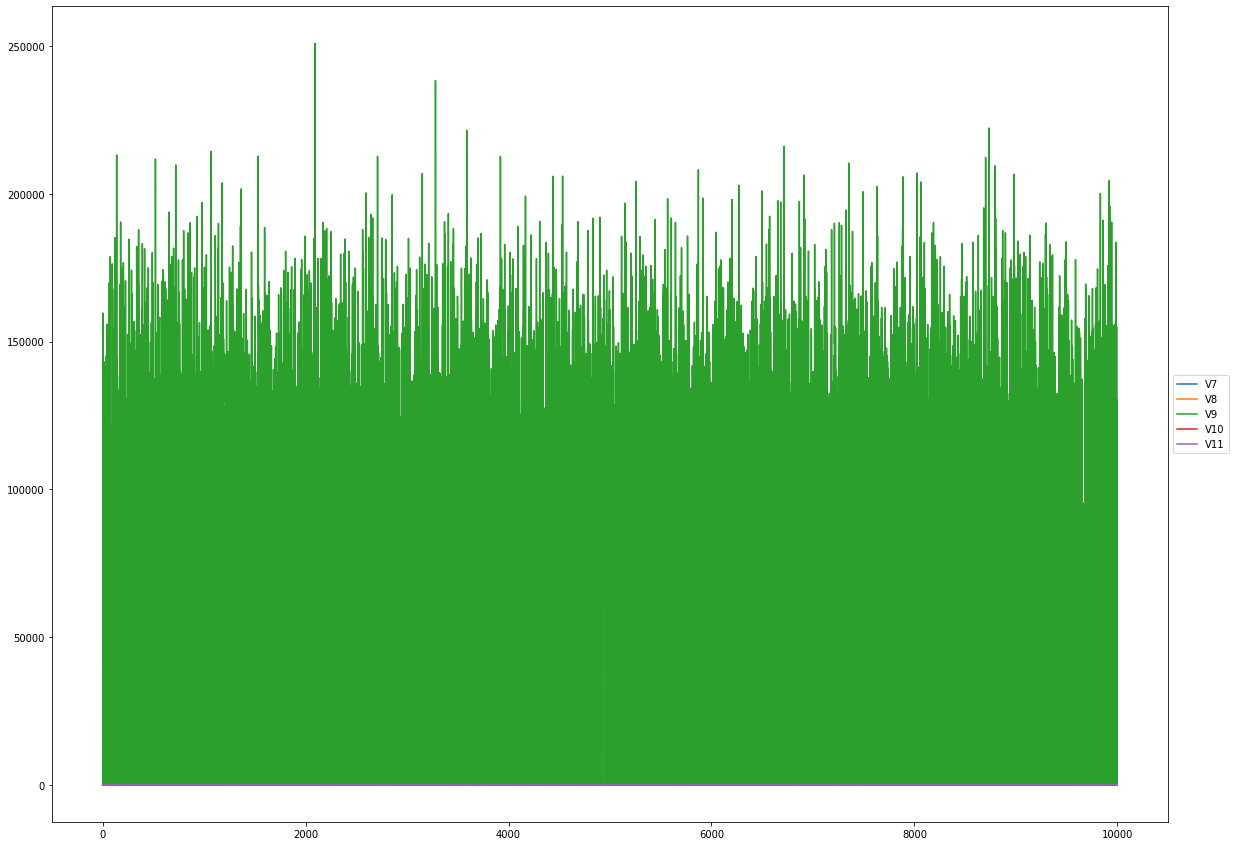

In [ ]:
ax = df[["V7","V8","V9","V10","V11"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

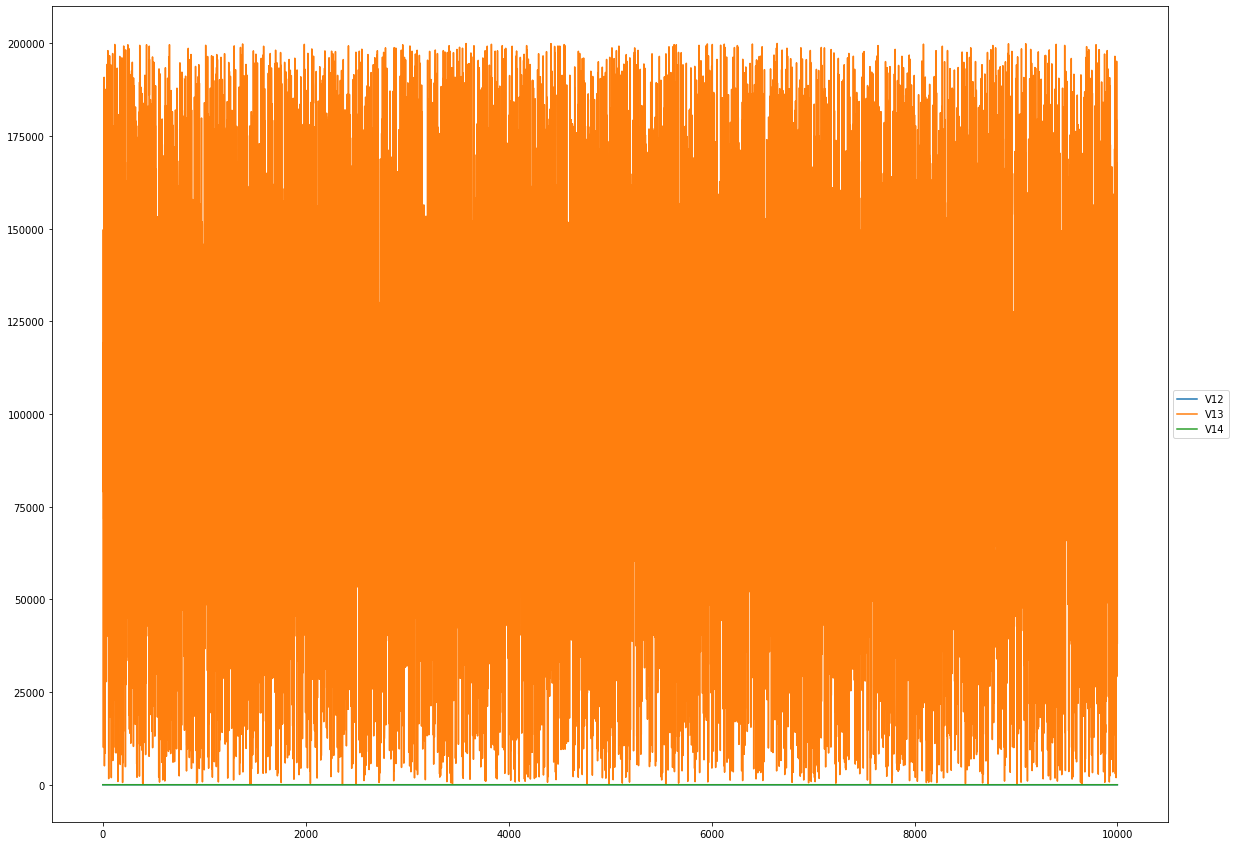

In [ ]:
ax = df[["V12","V13","V14"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

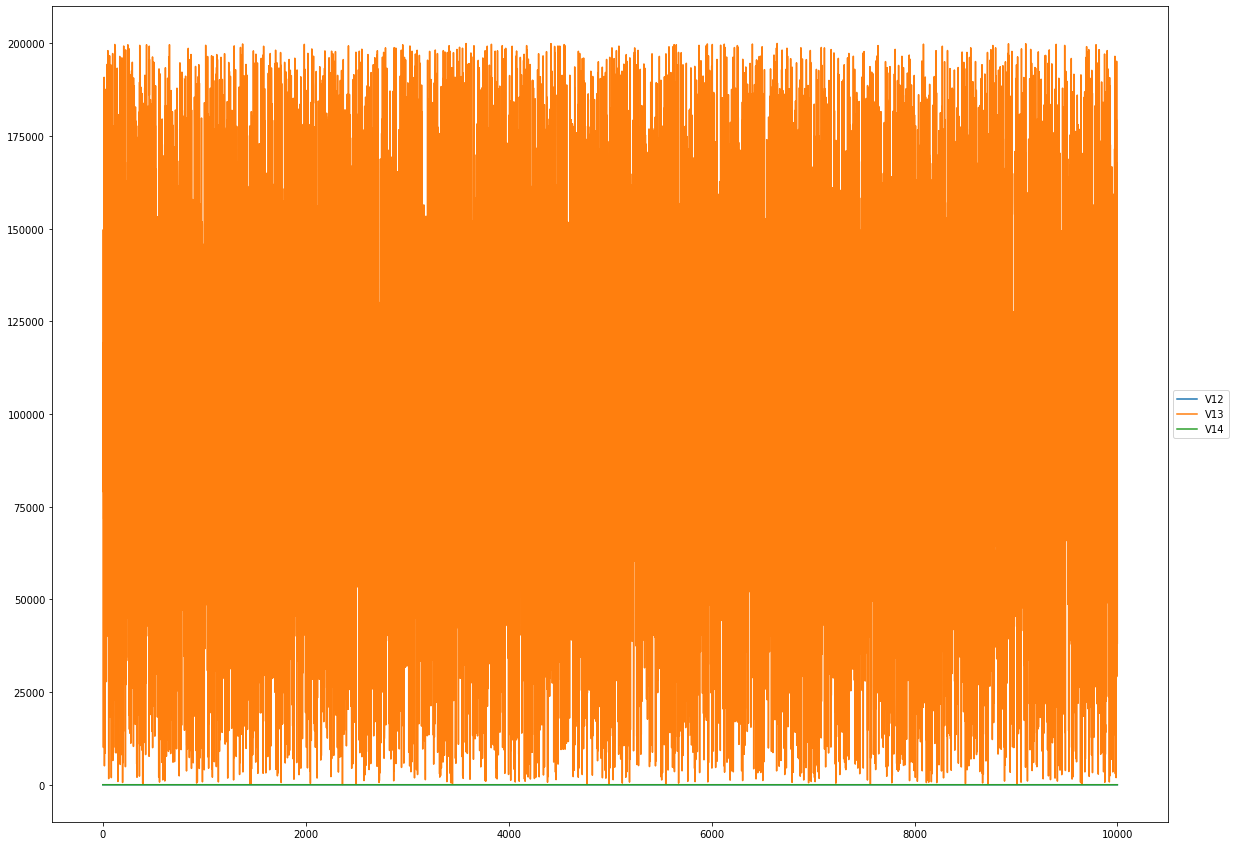

In [ ]:
ax = df[["V12","V13","V14"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

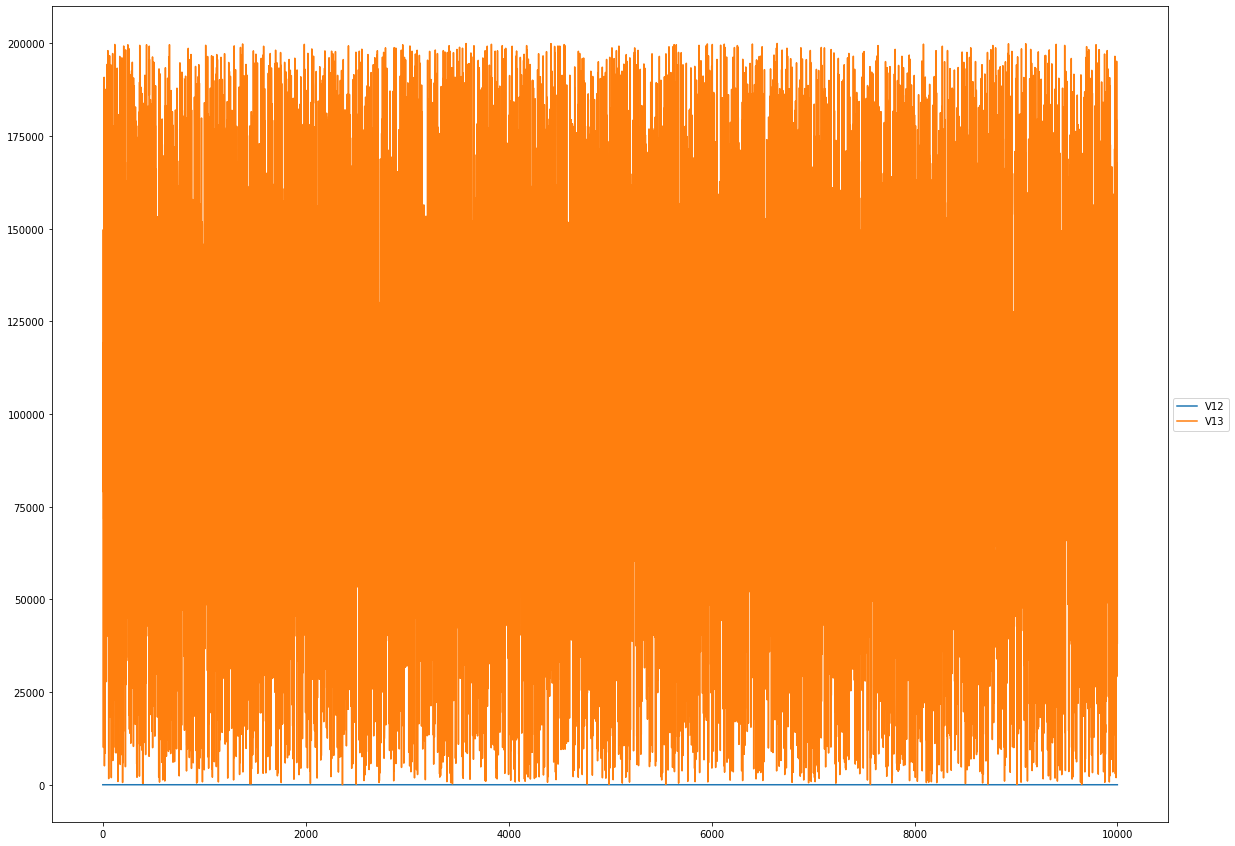

In [ ]:
ax = df[["V12","V13"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [ ]:
X.apply(np.mean)

TypeError: ignored

In [ ]:
def printMeanAndSdByGroup(variables, groupvariable):
    df_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(df_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(df_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DfFrame(data_groupby.apply(len)))

In [ ]:
printMeanAndSdByGroup(X, y)

## Means:


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,V2,V4,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,
1,15634602.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
2,15647311.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
3,15619304.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
4,15701354.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
5,15737888.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
...,...,...,...,...,...,...,...,...,...,...
9996,15606229.0,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0
9997,15569892.0,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0
9998,15584532.0,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0



## Standard deviations:


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,V2,V4,V7,V8,V9,V10,V11,V12,V13,V14
V1,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



## Sample sizes:


AttributeError: ignored

In [ ]:
def calcWithinGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the standard deviation for group i:
        sdi = np.std(levelidata)
        numi = (levelilength)*sdi**2
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the within-groups variance
    Vw = numtotal / (denomtotal - numlevels)
    return Vw

In [ ]:
calcWithinGroupsVariance(X.V2, y)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


nan

In [ ]:
def calcBetweenGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set((groupvariable)))
    numlevels = len(levels)
    # calculate the overall grand mean:
    grandmean = np.mean(variable)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the mean and standard deviation for group i:
        meani = np.mean(levelidata)
        sdi = np.std(levelidata)
        numi = levelilength * ((meani - grandmean)**2)
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the between-groups variance
    Vb = numtotal / (numlevels - 1)
    return(Vb)

In [ ]:
calcBetweenGroupsVariance(X.V2, y)


5174814873.886762

In [ ]:
def calcSeparations(variables, groupvariable):
    # calculate the separation for each variable
    for variablename in variables:
        variablei = variables[variablename]
        Vw = calcWithinGroupsVariance(variablei, groupvariable)
        Vb = calcBetweenGroupsVariance(variablei, groupvariable)
        sep = Vb/Vw
        print("variable", variablename, "Vw=", Vw, "Vb=", Vb, "separation=", sep)

In [ ]:
calcSeparations(X, y)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


variable V2 Vw= nan Vb= 5174814873.886762 separation= nan


TypeError: ignored

In [ ]:
def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0
    # get the covariance of variable 1 and variable 2 for each group:
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        # get the covariance for this group:
        term1 = 0.0
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):
            term1 += (levelidata1j - mean1)*(levelidata2j - mean2)
        Cov_groupi = term1 # covariance for this group
        Covw += Cov_groupi
    totallength = len(variable1)
    Covw /= totallength - numlevels
    return Covw

In [ ]:
calcWithinGroupsCovariance(X.V8, X.V11, y)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


nan

In [ ]:
def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # calculate the grand means
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)
    # calculate the between-groups covariance
    Covb = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength
        Covb += term1
    Covb /= numlevels - 1
    return Covb

In [ ]:
calcBetweenGroupsCovariance(X.V8, X.V11, y)


0.029772577257725197

In [ ]:
corr = stats.pearsonr(X.V2, X.V3)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

UFuncTypeError: ignored

In [ ]:
corrmat = X.corr()
corrmat

,V2,V4,V7,V8,V9,V10,V11,V12,V13,V14
V2,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
V4,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
V7,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
V8,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
V9,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
V10,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
V11,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
V12,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
V13,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
V14,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


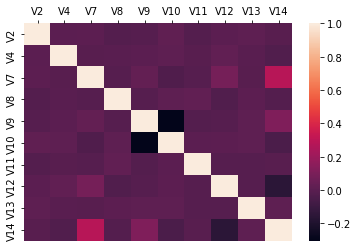

In [ ]:
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

In [ ]:
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()
    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))
    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    for (x, y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
        facecolor=color, edgecolor=color)
        ax.add_patch(rect)
    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)
    ax.autoscale_view()
    ax.invert_yaxis()

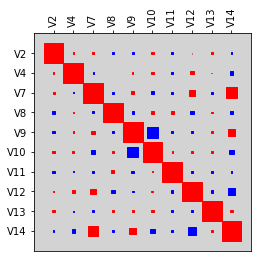

In [ ]:
hinton(corrmat)


In [ ]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [ ]:
mosthighlycorrelated(X, 10)



,FirstVariable,SecondVariable,Correlation
0,V9,V10,-0.304180
1,V7,V14,0.285323
2,V12,V14,-0.156128
3,V9,V14,0.118533
4,V7,V12,0.085472
5,V10,V14,-0.047820
6,V7,V10,-0.030680
7,V8,V12,-0.028362
8,V7,V9,0.028308
9,V4,V14,-0.027094


In [ ]:
pca = PCA().fit(standardisedX)

NameError: ignored

In [ ]:
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

ValueError: ignored

In [ ]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedX, y)

NameError: ignored